Распакуем DATASET

In [4]:
import pandas as pd

file_path = 'SOCR-HeightWeight.csv'
data = pd.read_csv(file_path)

data.head()


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Как мы видим у нас два вида переменных(вес и рост)
Я решил работать с переменной роста

План действий:
Построим график распределения роста.
Рассчитаем математическое ожидание, дисперсию, асимметрию и эксцесс.
Вычислим квантили (0.05 и 0.95) и 2.5%-ную точку.
Сравним распределение роста с нормальным распределением с теми же параметрами.


Извлекаем данные по росту

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

heights = data["Height(Inches)"]

Построим график распределения роста

(array([1.61350612e-04, 2.42025918e-04, 3.22701224e-04, 6.45402449e-04,
        4.67916775e-03, 5.64727143e-03, 1.38761526e-02, 2.43639424e-02,
        4.26772369e-02, 5.77635192e-02, 8.71293306e-02, 1.17140544e-01,
        1.54977263e-01, 1.79179855e-01, 2.01849616e-01, 2.08868367e-01,
        2.04673252e-01, 1.83939698e-01, 1.54331861e-01, 1.24239971e-01,
        8.83394602e-02, 6.99454904e-02, 4.09023802e-02, 2.47673190e-02,
        1.21819712e-02, 7.42212816e-03, 3.87241469e-03, 1.29080490e-03,
        1.12945429e-03, 3.22701224e-04]),
 array([60.27836   , 60.77417467, 61.26998933, 61.765804  , 62.26161867,
        62.75743333, 63.253248  , 63.74906267, 64.24487733, 64.740692  ,
        65.23650667, 65.73232133, 66.228136  , 66.72395067, 67.21976533,
        67.71558   , 68.21139467, 68.70720933, 69.203024  , 69.69883867,
        70.19465333, 70.690468  , 71.18628267, 71.68209733, 72.177912  ,
        72.67372667, 73.16954133, 73.665356  , 74.16117067, 74.65698533,
        75.1528 

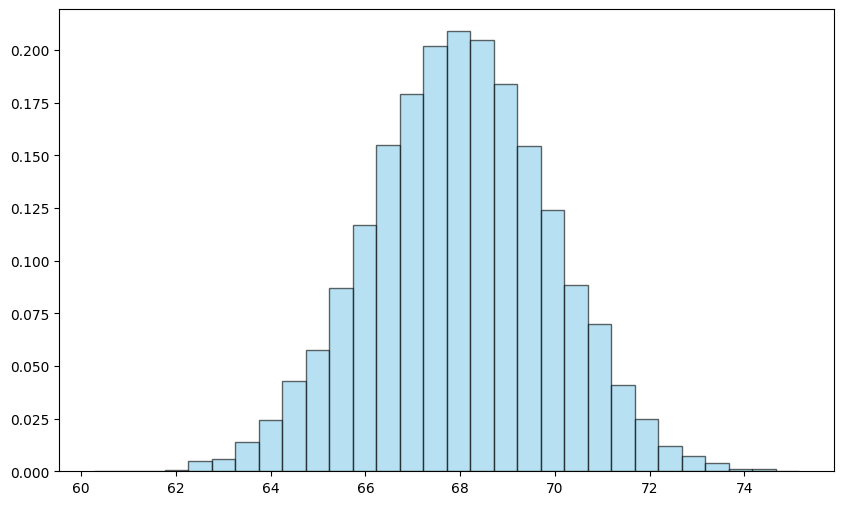

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(heights, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Empirical Distribution')

Добавляем кривую нормального распределения для визуального сравнения

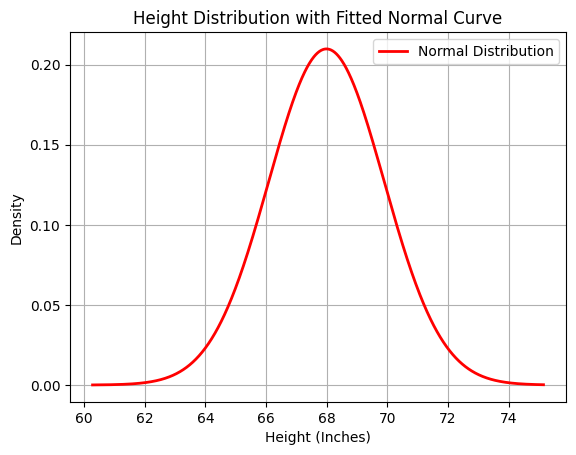

In [11]:
mean_height = heights.mean()
std_height = heights.std()
x = np.linspace(heights.min(), heights.max(), 1000)
plt.plot(x, norm.pdf(x, loc=mean_height, scale=std_height), 'r-', lw=2, label='Normal Distribution')
plt.title('Height Distribution with Fitted Normal Curve')
plt.xlabel('Height (Inches)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

Рассчет характеристики распределения и квантили

In [13]:
mean = heights.mean()
variance = heights.var()
asymmetry = skew(heights)
excess_kurtosis = kurtosis(heights)

quantile_05 = np.quantile(heights, 0.05)
quantile_95 = np.quantile(heights, 0.95)
percentile_2_5 = np.percentile(heights, 2.5)

In [14]:
mean, variance, asymmetry, excess_kurtosis, quantile_05, quantile_95, percentile_2_5

(np.float64(67.99311359679999),
 np.float64(3.616382148854081),
 np.float64(-0.005657639882518977),
 np.float64(-0.03539236835811055),
 np.float64(64.82764999999999),
 np.float64(71.110197),
 np.float64(64.25239125))

Результаты анализа распределения роста (Height(Inches)):
Математическое ожидание (mean): 67.99
Дисперсия (variance): 3.62
Асимметрия (skewness): −0.006 (распределение близко симметрично)
Эксцесс (kurtosis): −0.035 (распределение близко к нормальному)

Квантили:
5% квантиль (0.05): 64.83
95% квантиль (0.95): 71.11
2.5%-ная точка: 64.25


Построим сравнительную диаграмму для эмпирического и нормального распределений с рассчитанными параметрами.

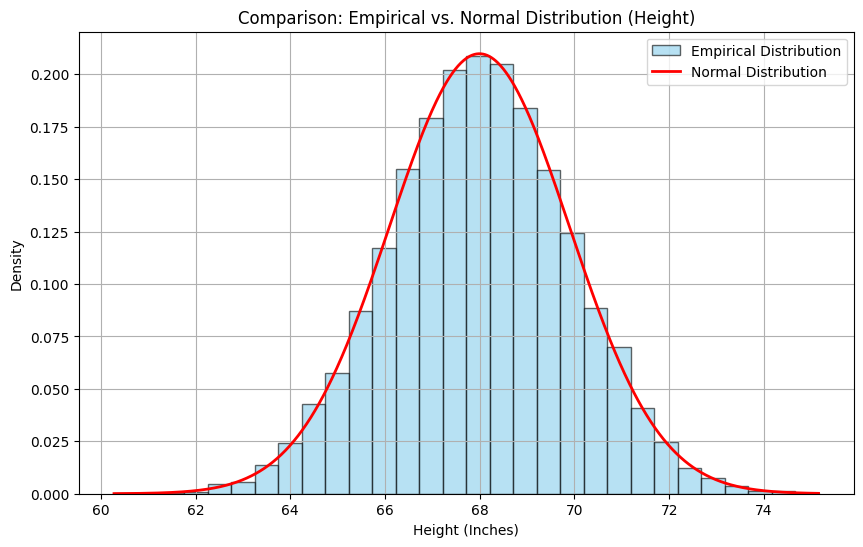

In [15]:
plt.figure(figsize=(10, 6))

plt.hist(heights, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Empirical Distribution')

plt.plot(x, norm.pdf(x, loc=mean, scale=np.sqrt(variance)), 'r-', lw=2, label='Normal Distribution')

plt.title('Comparison: Empirical vs. Normal Distribution (Height)')
plt.xlabel('Height (Inches)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


Эмпирическое распределение очень близко к нормальному закону, что подтверждается расчетами (малая асимметрия и эксцесс).